In [8]:
!pip install pycaret

import pandas as pd

from pycaret.classification.functional import *

In [3]:
df = pd.read_csv('LLCP2023_clean.csv')

In [4]:
# initialize setup
s = setup(data=df, target='_MENT14D', data_split_stratify=True, normalize=True, session_id=123)

In [5]:
best = compare_models(sort='F1')
print(best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:05:26
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [9]:
model = create_model('gbc')
print(model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:08:17
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [11]:
tuned_model = tune_model(model)
print(tuned_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:11:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [12]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
predict_model(tuned_model)

,_AGEG5YR,_ASTHMS1,_BMI5CAT,_CHLDCNT,_DRDXAR2,_EDUCAG,_IMPRACE,_INCOMG1,_MICHD,_PHYS14D,...,POORHLTH,SDHSTRE1,SDLONELY,SEXVAR,_TOTINDA,_DRNKWK21,CHCSCNC,_MENT14D,prediction_label,prediction_score
47848,Age 30 to 39,No,Normal Weight,Yes,No,College or Technical School,White,"$50,000 to < $100,000",Yes,1-13 days,...,NaN,Never,Rarely,Male,Yes,No,No,1-13 days,Zero days,0.5816
31613,Age 50 to 59,No,Overweight,No,No,College or Technical School,Other,"$50,000 to < $100,000",No,1-13 days,...,NaN,Rarely,Sometimes,Female,Yes,Yes,No,1-13 days,1-13 days,0.5823
36015,Age 50 to 59,Yes,Obese,Yes,No,Attended College,Other,"$50,000 to < $100,000",No,Zero days,...,15.0,Usually,Always,Female,No,Yes,No,\t14+ days,\t14+ days,0.9501
70015,Age 40 to 49,No,Overweight,Yes,No,College or Technical School,White,"$200,000+",No,Zero days,...,20.0,Usually,Sometimes,Male,Yes,Yes,No,\t14+ days,\t14+ days,0.8850
68451,Age 30 to 39,No,Obese,Yes,No,College or Technical School,White,"$100,000 to < $200,00",No,1-13 days,...,2.0,Never,Sometimes,Female,Yes,No,No,Zero days,1-13 days,0.4953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19332,Age 40 to 49,No,Overweight,No,No,College or Technical School,Other,"$50,000 to < $100,000",No,Zero days,...,NaN,Never,Never,Male,Yes,Yes,No,1-13 days,1-13 days,0.9043
59795,Age 40 to 49,No,Overweight,Yes,No,Attended College,Other,"$25,000 to < $35,000",No,Zero days,...,NaN,Never,Sometimes,Female,Yes,No,No,1-13 days,1-13 days,0.8665
45908,Age 50 to 59,No,Overweight,Yes,No,College or Technical School,White,"$100,000 to < $200,00",No,Zero days,...,1.0,Always,Sometimes,Female,Yes,Yes,No,\t14+ days,1-13 days,0.6087
30178,Age 40 to 49,Yes,Obese,No,No,High School,Other,"$35,000 to < $50,000",No,Zero days,...,NaN,Rarely,Never,Female,Yes,Yes,No,1-13 days,1-13 days,0.8688


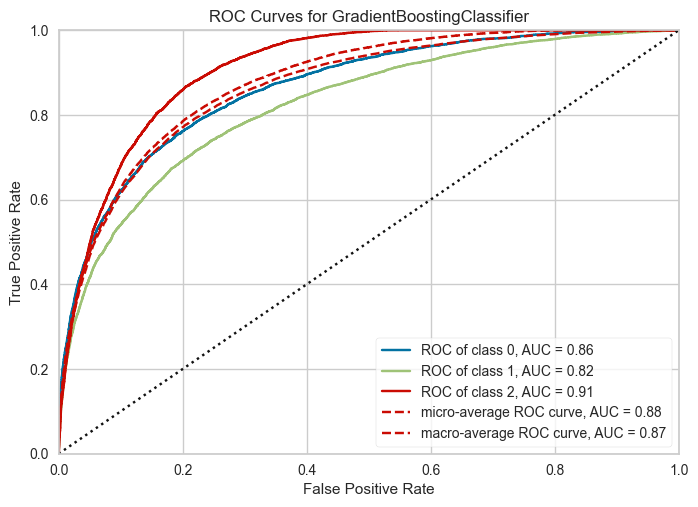

In [14]:
plot_model(best, plot = 'auc')